In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scqubits
from functools import partial
import qutip
import concurrent
from loky import get_reusable_executor
import numpy as np
import qutip
import scqubits
from typing import List, Union,Any

from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.drive import *
from CoupledQuantumSystems.evo import ODEsolve_and_post_process
from CoupledQuantumSystems.noise import *
from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.IFQ import gfIFQ

In [5]:
EJ = 4
EC = EJ / 2.7
EL = EJ / 45

qbt = gfIFQ(EJ=EJ, EC=EC, EL=EL, truncated_dim=20)
tlist = np.linspace(0, int(1e4), 1000)

temp_in_mK =20
loss_tangent_ref = 5e-6
one_over_f_flux_noise_amplitude = 1e-6

c_ops=qbt.get_T1_c_ops(temp_in_mK,
                        loss_tangent_ref,
                        one_over_f_flux_noise_amplitude)
e_ops = [qutip.ket2dm(qutip.basis(qbt.truncated_dim, i)) for i in range(11)]

qls = [4,5,6,7,8,9,10]
results  = qbt.run_qutip_mesolve_parrallel(
    initial_states = [qutip.basis(qbt.truncated_dim, i) for i in qls],
    tlist = tlist,
    drive_terms = [],
    c_ops = c_ops,
    e_ops = e_ops
)

 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/CoupledQuantumSystems/IFQ.py: 63

 Total run time: 142.44s*] Elapsed 142.44s / Remaining 00:00:00:00 [*********94%********** ] Elapsed 138.62s / Remaining 00:00:00:08
 Total run time: 145.40s*] Elapsed 145.40s / Remaining 00:00:00:00
 Total run time: 145.66s*] Elapsed 145.66s / Remaining 00:00:00:00
 Total run time: 146.37s*] Elapsed 146.37s / Remaining 00:00:00:00 [*********99%***********] Elapsed 145.97s / Remaining 00:00:00:01
 Total run time: 146.69s*] Elapsed 146.69s / Remaining 00:00:00:00
 Total run time: 147.05s*] Elapsed 147.05s / Remaining 00:00:00:00
 Total run time: 430.48s*] Elapsed 430.48s / Remaining 00:00:00:00


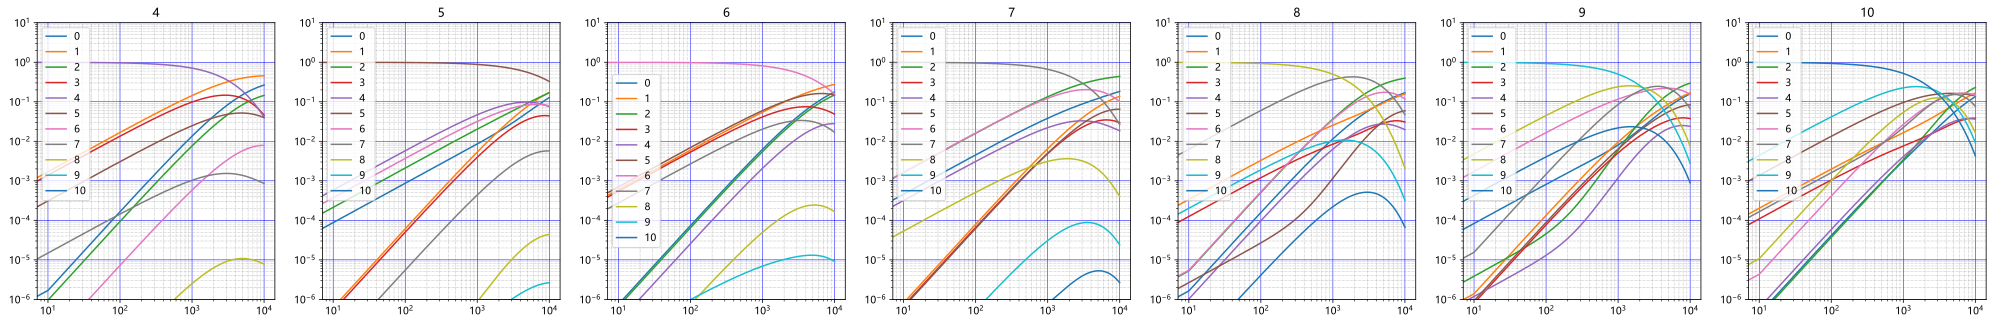

In [7]:
fig, axes = plt.subplots(1,len(qls),figsize= (len(qls)*5,5))
for ql, result, ax in zip(qls,
                          results,
                          axes.flatten()):
    for i, exp in enumerate(result.expect[:11]):
        ax.plot(tlist,exp,label= f"{i}")
    ax.legend()
    ax.set_title(f"{ql}")
    ax.set_yscale('log')
    ax.set_ylim(1e-6,1e1)
    ax.set_xscale('log')

    ax.minorticks_on()
    ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='blue')  # Major grid
    ax.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor grid
    ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))


In [10]:
qbt.evals[7]-qbt.evals[6],qbt.evals[6]-qbt.evals[5],qbt.evals[5]-qbt.evals[4]

(0.7490200181350026, 0.26303518602308706, 0.2654099782279191)

In [9]:
qbt.evals[1]-qbt.evals[0]

1.6762102269945496